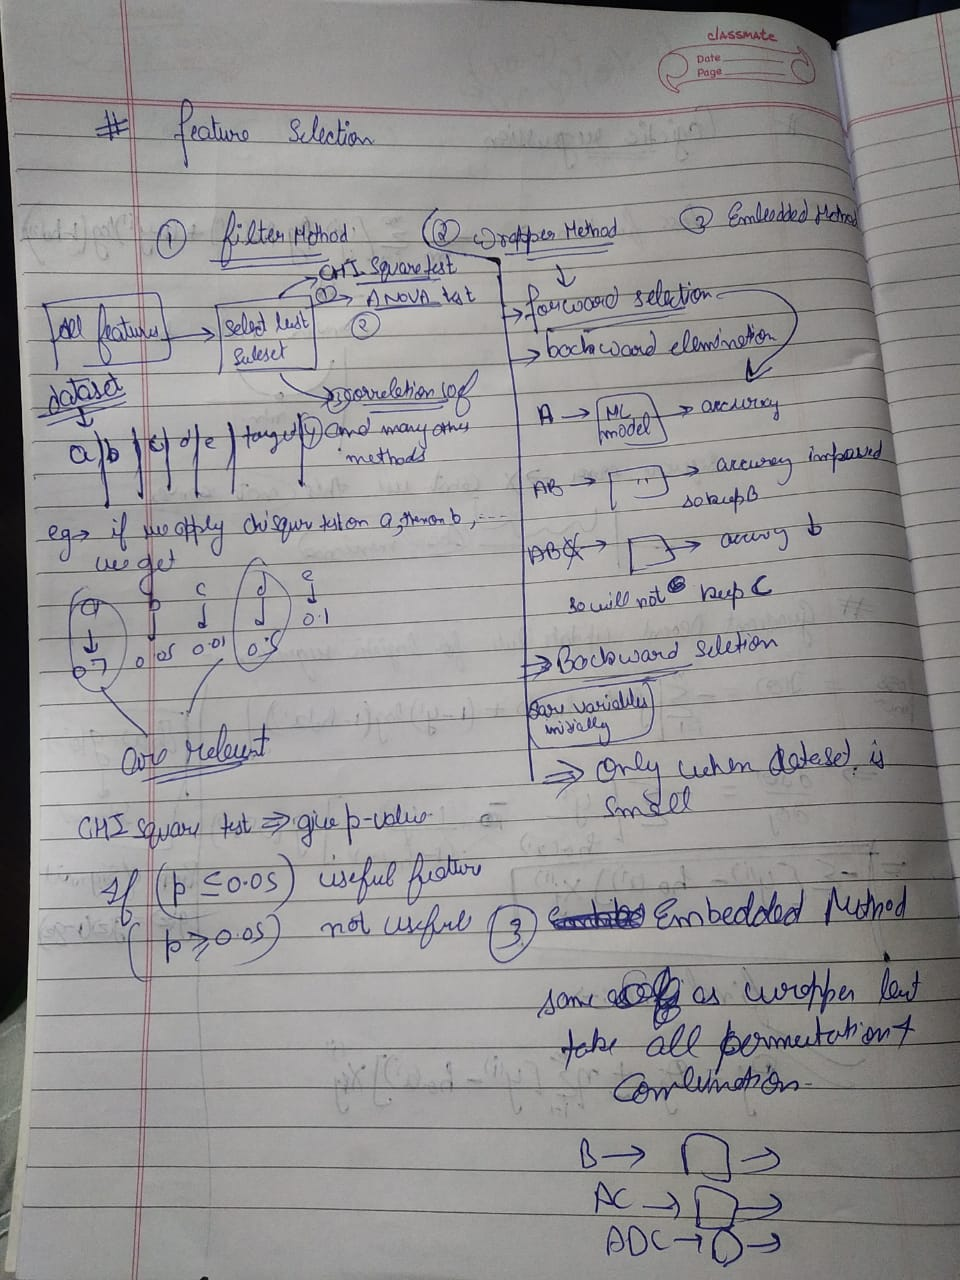

In [1]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\feature selection\train.csv")

In [7]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## univariate selection

In [5]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [8]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [9]:
print(x.shape,y.shape)

(2000, 20) (2000,)


In [10]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
#apply selectkbest top 10 features

In [11]:
best_features=SelectKBest(score_func=chi2,k=10)

In [12]:
fit=best_features.fit(x,y)

In [13]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [14]:
df1=pd.DataFrame(fit.scores_)
df2=pd.DataFrame(x.columns)

In [19]:
df_scores=pd.concat([df1,df2],axis=1)

In [20]:
df_scores

,0,0
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores


In [21]:
df_scores.columns=['scores','features']

In [23]:
df_scores.sort_values(by='scores',ascending=False)

,scores,features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


## feature importance

In [24]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [25]:
model=RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [26]:
model.feature_importances_

array([0.073277  , 0.00689241, 0.02631424, 0.00691083, 0.02367785,
       0.00665576, 0.03559528, 0.02488086, 0.03873512, 0.02220095,
       0.03014743, 0.05632623, 0.05875229, 0.48556689, 0.02727211,
       0.02764068, 0.0306217 , 0.0053338 , 0.00712133, 0.00607725])

In [33]:
f1=pd.DataFrame(model.feature_importances_,index=x.columns,columns=['imp'])

In [29]:
# feature_imp=pd.concat([f2,f1],axis=1)

In [30]:
# feature_imp.columns=['features','importance']

In [32]:
# feature_imp

In [35]:
f1=f1.sort_values(by='imp',ascending=False)

In [36]:
f1

,imp
ram,0.485567
battery_power,0.073277
px_width,0.058752
px_height,0.056326
mobile_wt,0.038735
int_memory,0.035595
talk_time,0.030622
pc,0.030147
sc_w,0.027641
sc_h,0.027272


<BarContainer object of 20 artists>

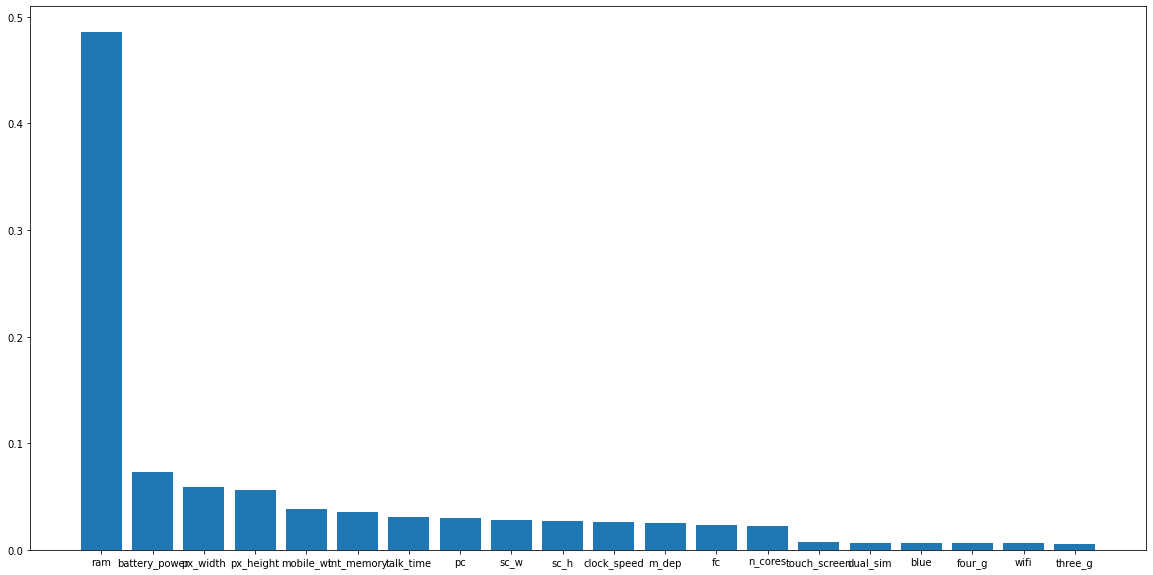

In [37]:
plt.figure(figsize=(20,10))
plt.bar(f1.index,f1['imp'])

## correlation matrix

In [43]:
data_cor=data.corr()

In [44]:
data_cor

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


# Feature Extraction

## PCA

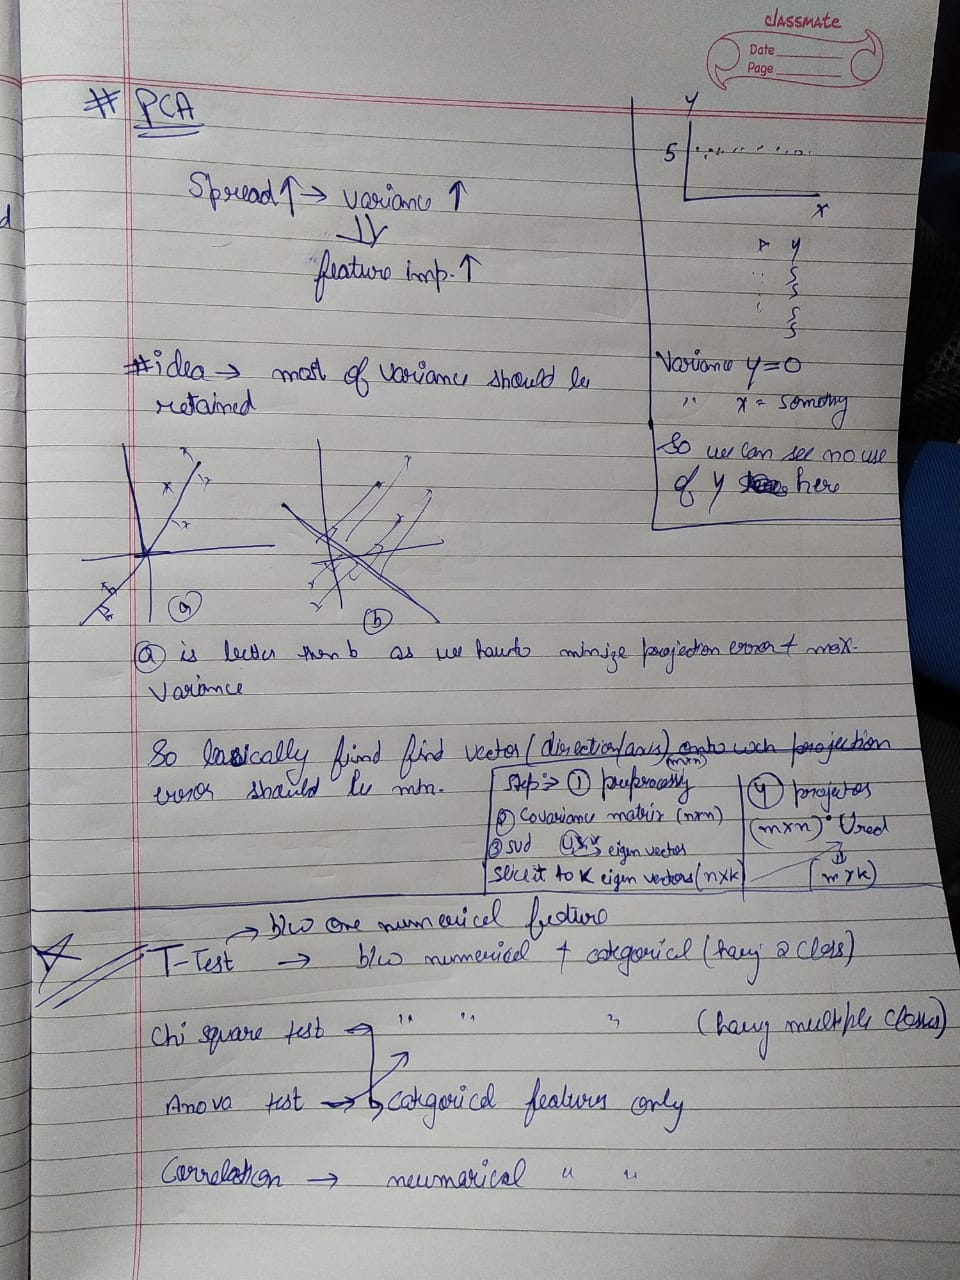

In [16]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [27]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [15]:
# x_test[1]

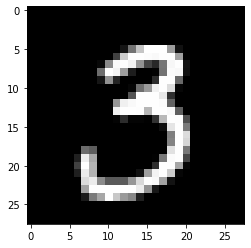

In [17]:
plt.imshow(x_test[90],cmap='gray')

In [28]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [20]:
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


### step-1 (Preprocessing)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()
x_=sc.fit_transform(x_train)

In [24]:
x_.shape

(60000, 784)

In [31]:
x_test=sc.transform(x_test)

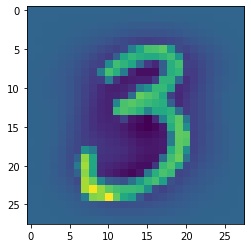

In [35]:
plt.imshow(x_test[90].reshape(28,28))

### sklearn PCA

In [36]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA(n_components=2)

In [39]:
z_pca=pca.fit_transform(x_)

In [40]:
z_pca.shape

(60000, 2)

In [42]:
pca.explained_variance_

array([40.48763511, 29.24169676])

In [57]:
z_pca

array([[-0.92223178, -4.81193513],
       [ 8.7090053 , -7.75430751],
       [ 2.3283364 ,  9.42931612],
       ...,
       [-3.77722482, -3.22876197],
       [ 1.72240716, -4.94654836],
       [-1.42726331, -6.17609218]])

#### here approx 70% variance is explained of the original data 30% is lost

## Custom PCA

In [43]:
import numpy as np

In [ ]:
# step-2 compute covariance matrix

In [44]:
#trick to find covariance matrix
covar=np.dot(x_.T,x_)

In [45]:
covar.shape

(784, 784)

In [ ]:
# step-3 compute eigen values using svd

In [46]:
from numpy.linalg import svd

In [50]:
u,s,v=svd(covar)

In [51]:
u.shape

(784, 784)

In [52]:
ured=u[:,:2]

In [53]:
ured.shape

(784, 2)

In [ ]:
# step-4 projection of data 

In [54]:
z=np.dot(x_,ured)

In [55]:
z.shape

(60000, 2)

In [56]:
z

array([[-0.92215881, -4.81479035],
       [ 8.70897698, -7.75440302],
       [ 2.32838932,  9.43133817],
       ...,
       [-3.77721201, -3.23056436],
       [ 1.72236917, -4.94812525],
       [-1.42725062, -6.17538558]])

## visualize data

In [58]:
import pandas as pd

In [60]:
new_dataset=np.hstack((z,y_train.reshape(-1,1)))

In [61]:
dataframe=pd.DataFrame(new_dataset,columns=['pc1','pc2','label'])

In [62]:
dataframe.head()

,pc1,pc2,label
0,-0.922159,-4.814790,5.0
1,8.708977,-7.754403,0.0
2,2.328389,9.431338,4.0
3,-6.582173,-3.746318,1.0
4,-5.183251,3.133297,9.0


<Figure size 1080x1080 with 0 Axes>

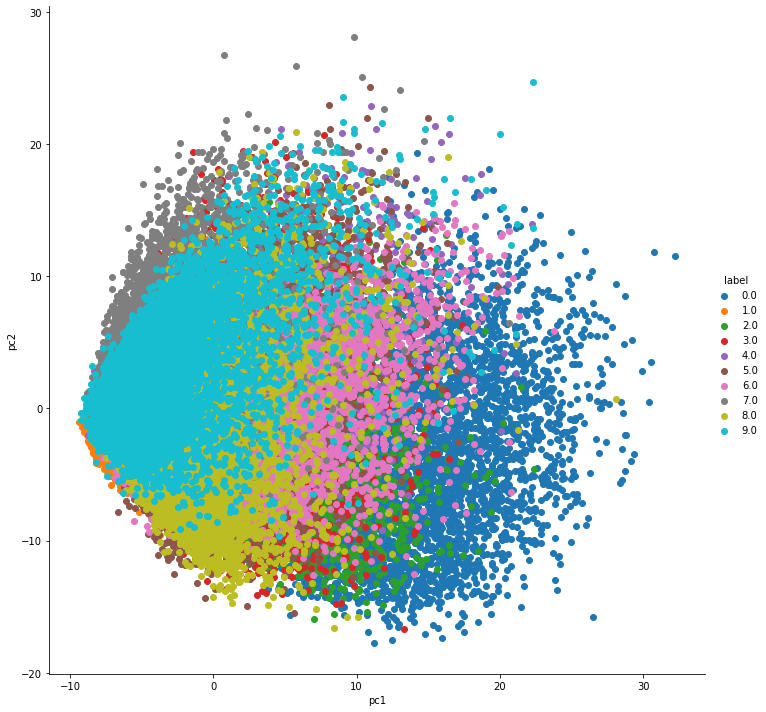

In [65]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(dataframe,hue='label',height=10)
fg.map(plt.scatter,'pc1','pc2')
fg.add_legend()
plt.show()

## PCA with 784

In [66]:

pca = PCA()

In [67]:

Z_pca= pca.fit_transform(x_)

In [68]:
Z_pca.shape

(60000, 784)

In [69]:
cum_var_exaplined = np.cumsum(pca.explained_variance_ratio_)

In [70]:
cum_var_exaplined

array([0.05646717, 0.09724989, 0.13464369, 0.16349484, 0.18870593,
       0.21064863, 0.22988207, 0.24734006, 0.26269099, 0.27670818,
       0.29012561, 0.30216303, 0.31330873, 0.32420796, 0.33449446,
       0.34443932, 0.35380315, 0.36301361, 0.37194798, 0.3806471 ,
       0.38892074, 0.39695491, 0.40460336, 0.41202109, 0.41917402,
       0.42609249, 0.43293384, 0.43950059, 0.44581736, 0.45194656,
       0.45790911, 0.46378627, 0.46950219, 0.47512526, 0.48067208,
       0.48605627, 0.49136809, 0.49656415, 0.50164626, 0.50644631,
       0.51121087, 0.51590227, 0.52044576, 0.52495921, 0.52942885,
       0.53386268, 0.53824483, 0.54254865, 0.54681743, 0.5510539 ,
       0.55510086, 0.55909534, 0.5630699 , 0.56700811, 0.57086624,
       0.57465667, 0.57841069, 0.58211845, 0.5857679 , 0.5893609 ,
       0.59288472, 0.59636266, 0.59980677, 0.60320546, 0.606565  ,
       0.60991386, 0.6132325 , 0.61646276, 0.61962553, 0.62275797,
       0.62586528, 0.62893771, 0.63198685, 0.63501403, 0.63800

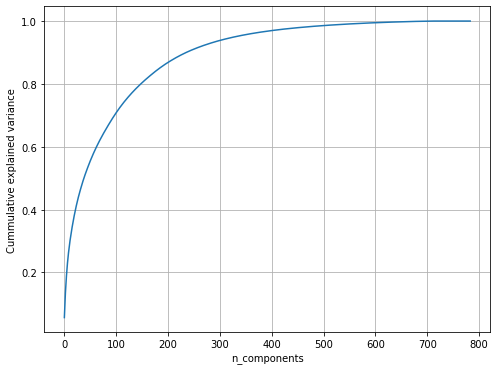

In [71]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_exaplined)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.show()